Proszę przygotować rozwiązanie (program, funkcję, polecenie) w języku Python, które pozwoli na segmentację modeli samochodów, za pomocą poznanych metod grupowania.

In [58]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN

from plotnine import *

from sklearn.metrics import silhouette_score

In [50]:
df = pd.read_csv('auta.csv', index_col=0)

In [51]:
auta = df.copy()
auta.head(10)

,Cena,Przebieg,Pojemnosc,KM,diesle
Audi A3,20900.0,164450.0,1896.0,110,66.9
Audi A4,25311.4,182000.0,1900.0,130,75.7
Audi A6,31500.0,185000.0,2496.0,170,82.5
Audi A8,109000.0,129380.0,4134.0,300,68.1
Audi Q7,179000.0,72000.0,3000.0,240,89.1
BMW 316,6150.0,186000.0,1600.0,105,1.7
BMW 318,14500.0,173980.0,1895.0,118,32.8
BMW 320,21699.0,178000.0,2000.0,150,81.4
BMW 520,55900.0,149350.0,1998.0,163,65.7
BMW 525,17110.0,207000.0,2499.0,163,87.7


In [52]:
z = StandardScaler()

auta[auta.columns] = z.fit_transform(df[df.columns])

km = KMeans(n_clusters=2).fit(auta)
gm = GaussianMixture(n_components=2).fit(auta)
db = DBSCAN(eps=0.3, min_samples=10).fit(auta)

df['klastry_km'] = km.labels_
df['klastry_gm'] = gm.predict(auta)
df['klastry_db'] = db.labels_

In [125]:
ks = range(2, 20)

sylwetka_km = []
sylwetka_gm = []
sylwetka_db = []

for k in ks:
    km = KMeans(n_clusters=k).fit(auta)
    gm = GaussianMixture(n_components=k).fit(auta)
    db = DBSCAN(eps=0.5 + k*0.025, min_samples=5).fit(auta)
    df['klastry_km'] = km.labels_
    df['klastry_gm'] = gm.predict(auta)
    df['klastry_db'] = db.labels_
    sylwetka_km.append(round(silhouette_score(auta, km.labels_), 4))
    sylwetka_gm.append(round(silhouette_score(auta, gm.predict(auta)), 4))
    sylwetka_db.append(round(silhouette_score(auta, db.labels_), 4))

In [127]:
sylwetki_km_df = pd.DataFrame({'K': ks,
                           'Sylwetka': sylwetka_km})
sylwetki_gm_df = pd.DataFrame({'K': ks,
                           'Sylwetka': sylwetka_gm})
sylwetki_db_df = pd.DataFrame({'K': ks,
                           'Sylwetka': sylwetka_db})

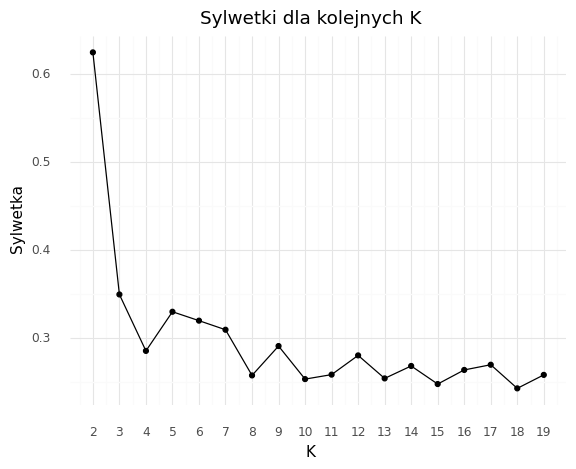

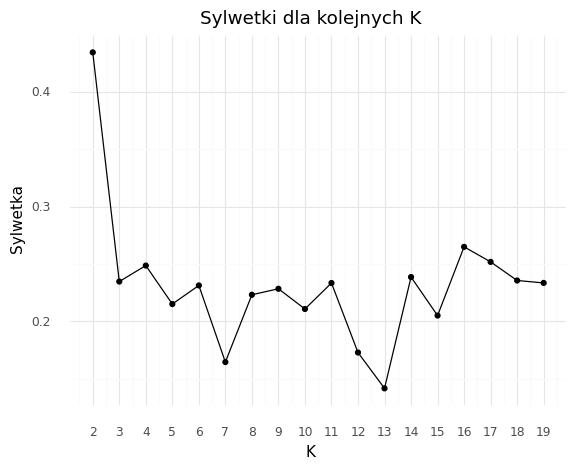

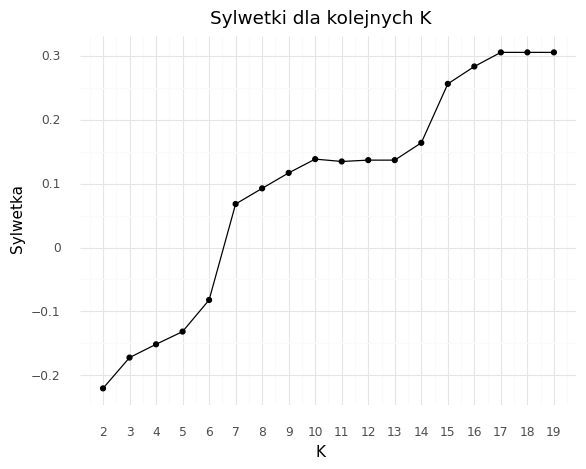

In [128]:
for df_temp in [sylwetki_km_df, sylwetki_gm_df, sylwetki_db_df]:
    print((ggplot(df_temp, aes(x = 'K', y='Sylwetka'))+
     geom_point() +
     scale_x_continuous(breaks = ks) +
     geom_line() +
     theme_minimal() +
     labs(title= 'Sylwetki dla kolejnych K')))

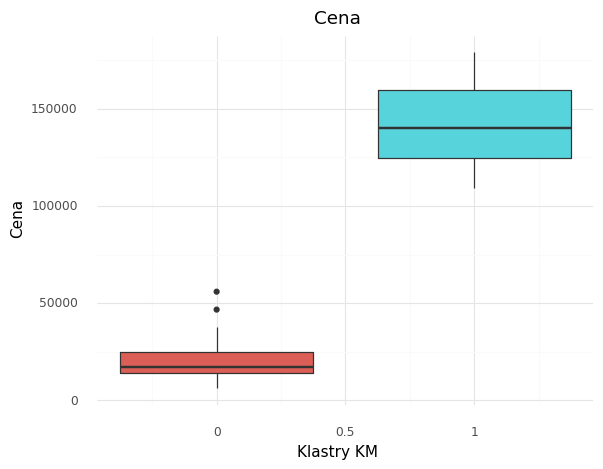

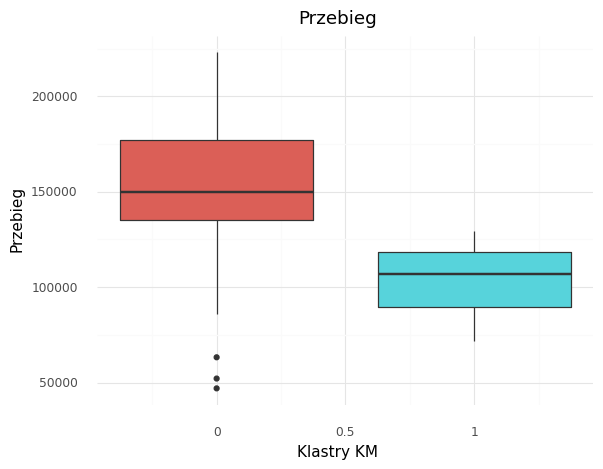

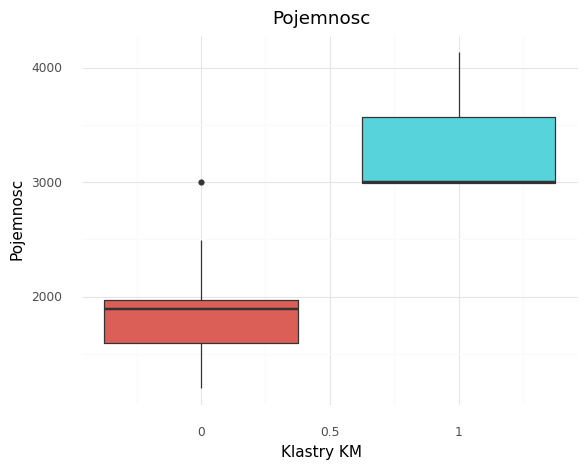

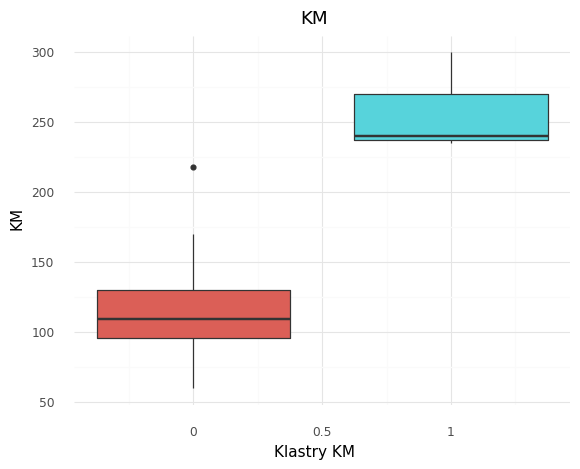

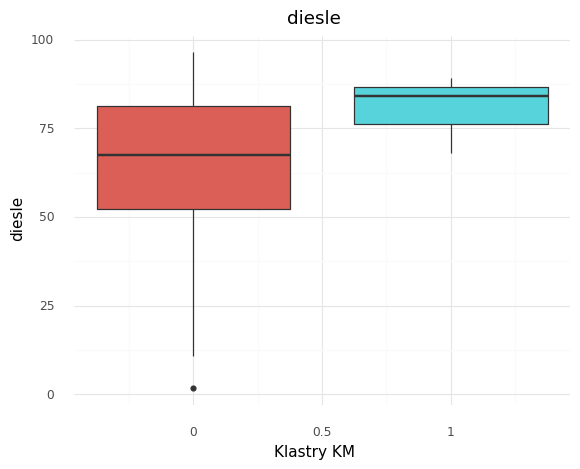

In [54]:
for zm in auta.columns:
    print((ggplot(df, aes(x='klastry_km', y=zm, fill = 'factor(klastry_km)'))+
 geom_boxplot(show_legend=False) +
 theme_minimal() +
 labs(x = 'Klastry KM', title = zm)))

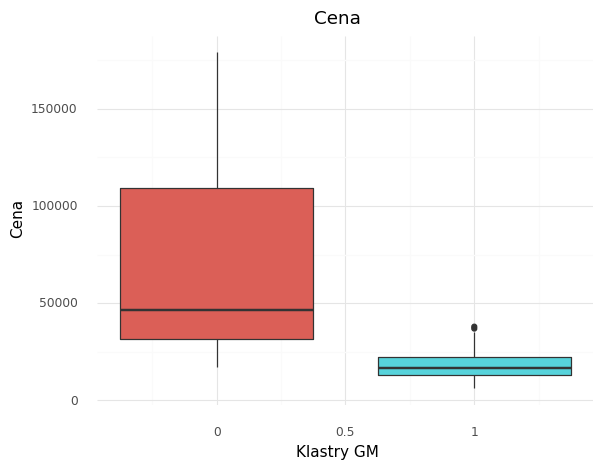

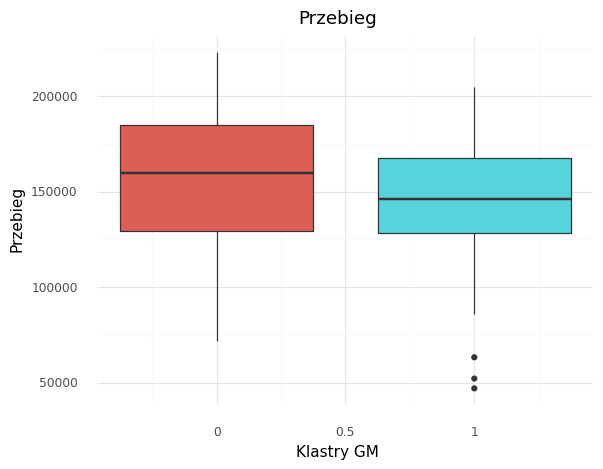

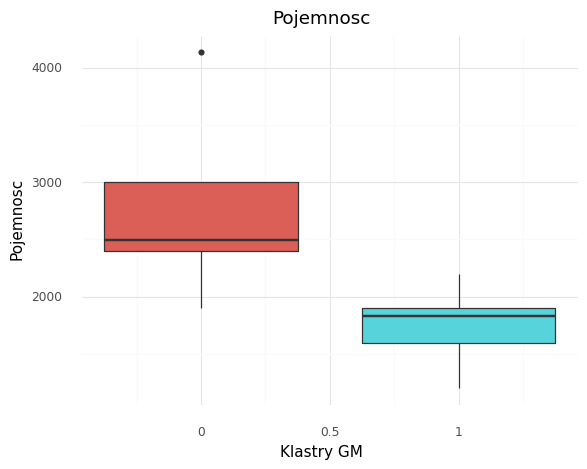

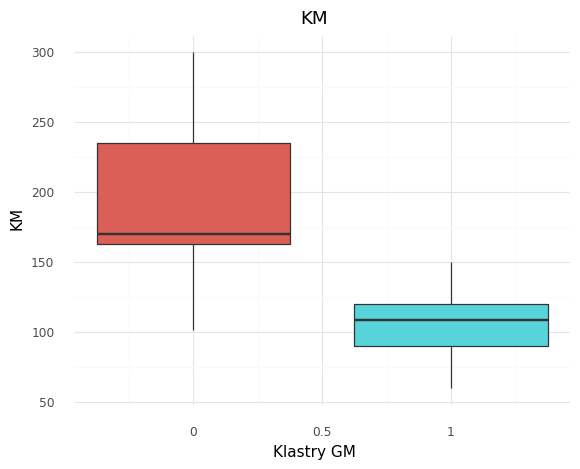

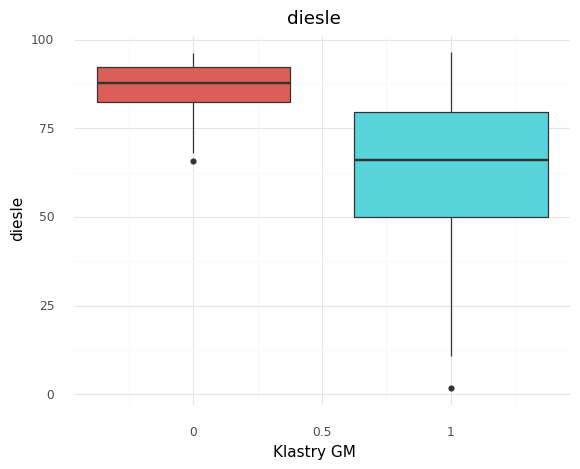

In [55]:
for zm in auta.columns:
    print((ggplot(df, aes(x='klastry_gm', y=zm, fill = 'factor(klastry_gm)'))+
 geom_boxplot(show_legend=False) +
 theme_minimal() +
 labs(x = 'Klastry GM', title = zm)))

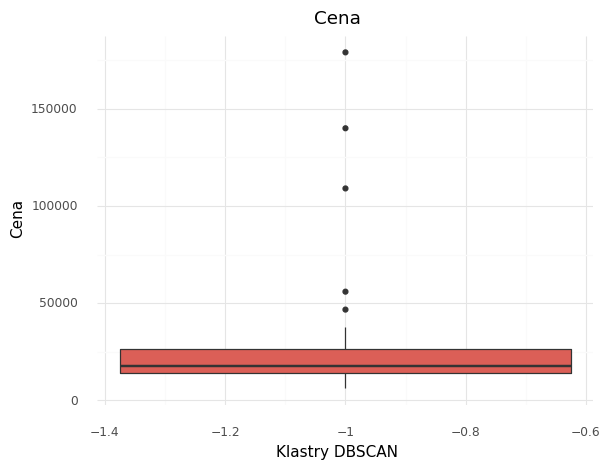

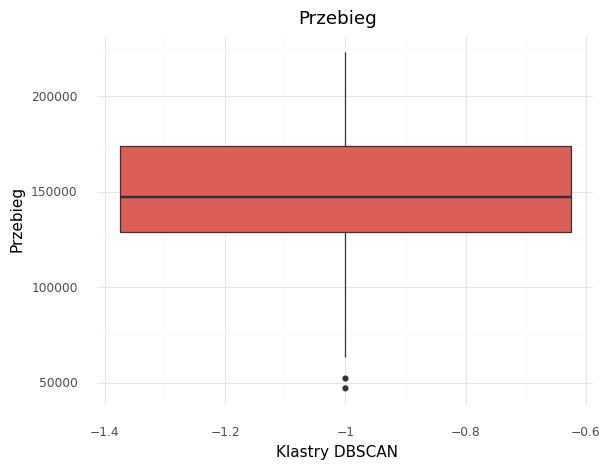

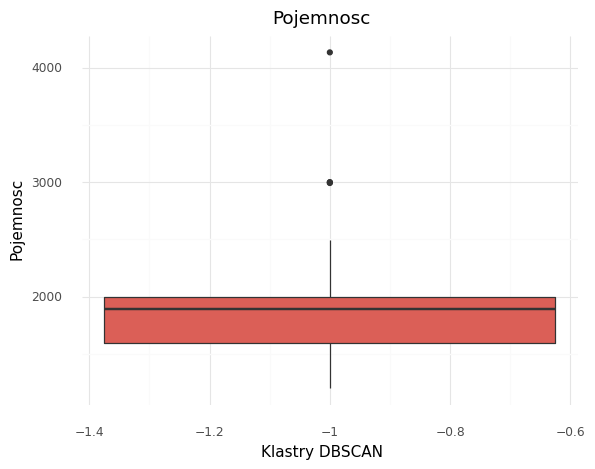

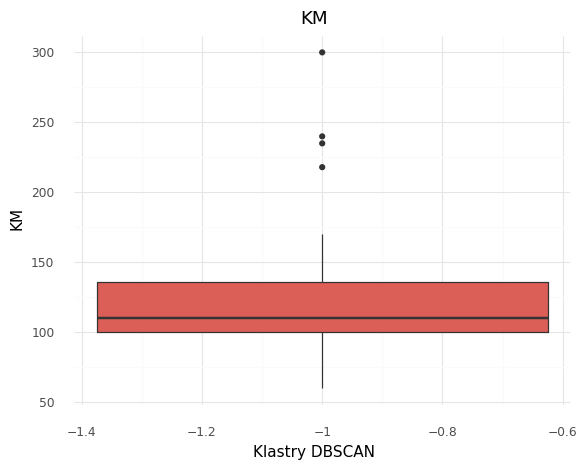

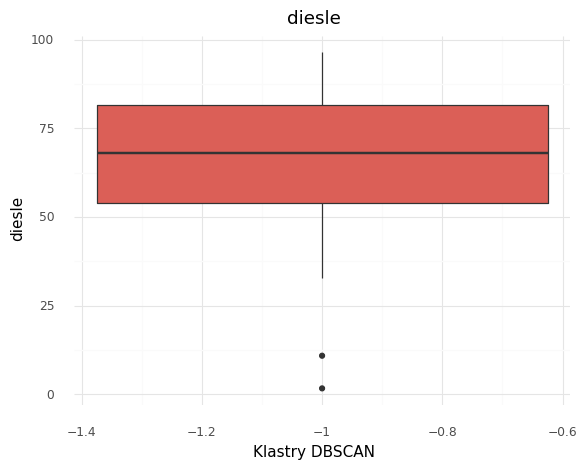

In [56]:
for zm in auta.columns:
    print((ggplot(df, aes(x='klastry_db', y=zm, fill = 'factor(klastry_db)'))+
 geom_boxplot(show_legend=False) +
 theme_minimal() +
 labs(x = 'Klastry DBSCAN', title = zm)))